In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

In [2]:
df = pd.read_csv("D:\Study\BA\TEST\Linear\kc_house_data.csv")

In [3]:
#droping the useless variable
df = df.drop(['date','id'],axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [5]:
#checking missing value

In [6]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
#checking if target variable is a normal distribution or no

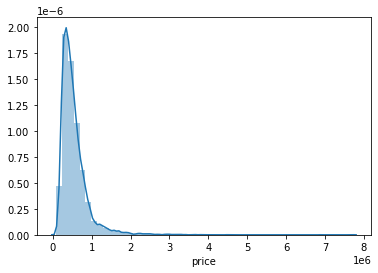

In [8]:
from scipy.stats import norm
from scipy import stats
sns.distplot(df['price']);

In [9]:
#it's positively skwed and will make it a normal distribution

In [10]:
from sklearn.preprocessing import StandardScaler
price_scaled = StandardScaler().fit_transform(df['price'][:,np.newaxis]);
low_range = price_scaled[price_scaled[:,0].argsort()][:10]
high_range= price_scaled[price_scaled[:,0].argsort()][-10:]

In [11]:
df['price'] = np.log(df['price'])

In [12]:
#checking outliers

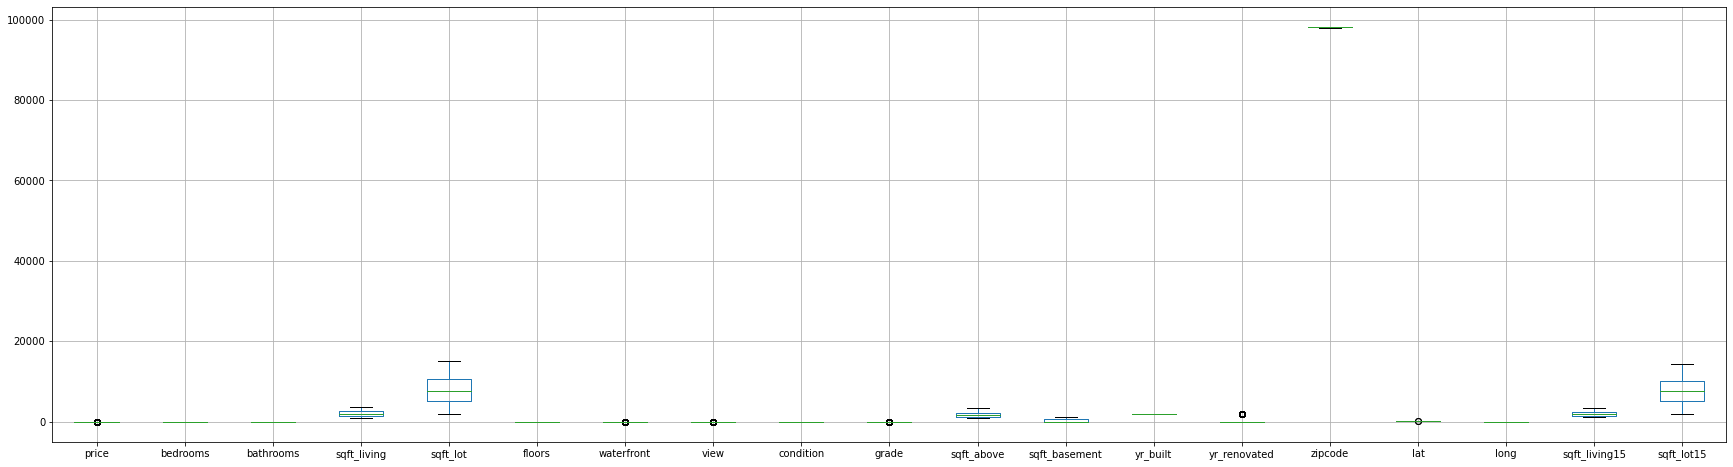

In [37]:
df.boxplot(figsize=(30,8))

In [14]:
min=df['bedrooms'].quantile(0.05)
max=df['bedrooms'].quantile(0.95)
new=np.where(df['bedrooms']<min,min,df['bedrooms'])
df.bedrooms=new
new=np.where(df['bedrooms']>max,max,df['bedrooms'])
df.bedrooms=new

In [15]:
min=df['bathrooms'].quantile(0.05)
max=df['bathrooms'].quantile(0.95)
new=np.where(df['bathrooms']<min,min,df['bathrooms'])
df.bathrooms=new
new=np.where(df['bathrooms']>max,max,df['bathrooms'])
df.bathrooms=new

In [16]:
min=df['sqft_living'].quantile(0.05)
max=df['sqft_living'].quantile(0.95)
new=np.where(df['sqft_living']<min,min,df['sqft_living'])
df.sqft_living=new
new=np.where(df['sqft_living']>max,max,df['sqft_living'])
df.sqft_living=new

In [17]:
min=df['sqft_lot'].quantile(0.05)
max=df['sqft_lot'].quantile(0.85)
new=np.where(df['sqft_lot']<min,min,df['sqft_lot'])
df.sqft_lot=new
new=np.where(df['sqft_lot']>max,max,df['sqft_lot'])
df.sqft_lot=new

In [18]:
min=df['condition'].quantile(0.05)
max=df['condition'].quantile(0.95)
new=np.where(df['condition']<min,min,df['condition'])
df.condition=new
new=np.where(df['condition']>max,max,df['condition'])
df.condition=new

In [19]:
min=df['grade'].quantile(0.05)
max=df['grade'].quantile(0.95)
new=np.where(df['grade']<min,min,df['grade'])
df.grade=new
new=np.where(df['grade']>max,max,df['grade'])
df.grade=new

In [20]:
min=df['sqft_above'].quantile(0.05)
max=df['sqft_above'].quantile(0.95)
new=np.where(df['sqft_above']<min,min,df['sqft_above'])
df.sqft_above=new
new=np.where(df['sqft_above']>max,max,df['sqft_above'])
df.sqft_above=new

In [21]:
min=df['sqft_basement'].quantile(0.05)
max=df['sqft_basement'].quantile(0.95)
new=np.where(df['sqft_basement']<min,min,df['sqft_basement'])
df.sqft_basement=new
new=np.where(df['sqft_basement']>max,max,df['sqft_basement'])
df.sqft_basement=new

In [22]:
min=df['long'].quantile(0.05)
max=df['long'].quantile(0.95)
new=np.where(df['long']<min,min,df['long'])
df.long=new
new=np.where(df['long']>max,max,df['long'])
df.long=new

In [23]:
min=df['sqft_living15'].quantile(0.05)
max=df['sqft_living15'].quantile(0.95)
new=np.where(df['sqft_living15']<min,min,df['sqft_living15'])
df.sqft_living15=new
new=np.where(df['sqft_living15']>max,max,df['sqft_living15'])
df.sqft_living15=new

In [24]:
min=df['sqft_lot15'].quantile(0.05)
max=df['sqft_lot15'].quantile(0.87)
new=np.where(df['sqft_lot15']<min,min,df['sqft_lot15'])
df.sqft_lot15=new
new=np.where(df['sqft_lot15']>max,max,df['sqft_lot15'])
df.sqft_lot15=new

In [25]:
corr = df.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.354798,0.534837,0.682460,0.136932,0.310558,0.174586,0.346522,0.023853,0.691343,0.584341,0.292371,0.080655,0.114498,-0.038306,0.449174,0.067530,0.608197,0.131378
bedrooms,0.354798,1.000000,0.524512,0.618829,0.213619,0.184797,-0.005608,0.082623,0.012728,0.374120,0.510173,0.293860,0.173623,0.017239,-0.168956,-0.017432,0.170342,0.427517,0.199456
bathrooms,0.534837,0.524512,1.000000,0.742546,0.095773,0.515435,0.052311,0.170978,-0.148160,0.659392,0.670150,0.251897,0.529155,0.045994,-0.212284,0.019200,0.257019,0.564795,0.092340
sqft_living,0.682460,0.618829,0.742546,1.000000,0.336023,0.363269,0.081541,0.258760,-0.074764,0.749706,0.863110,0.383599,0.333394,0.054790,-0.205216,0.049946,0.279049,0.761608,0.321771
sqft_lot,0.136932,0.213619,0.095773,0.336023,1.000000,-0.231744,0.097303,0.140398,0.089005,0.207944,0.302154,0.096274,0.030636,0.019227,-0.300643,-0.129152,0.359874,0.384381,0.912381
floors,0.310558,0.184797,0.515435,0.363269,-0.231744,1.000000,0.023698,0.029444,-0.281685,0.470847,0.548280,-0.261372,0.489319,0.006338,-0.059121,0.049614,0.130795,0.281191,-0.226783
waterfront,0.174586,-0.005608,0.052311,0.081541,0.097303,0.023698,1.000000,0.401857,0.018168,0.073247,0.061277,0.060326,-0.026161,0.092885,0.030285,-0.014274,-0.035080,0.085106,0.107279
view,0.346522,0.082623,0.170978,0.258760,0.140398,0.029444,0.401857,1.000000,0.045030,0.239218,0.153568,0.248153,-0.053440,0.103917,0.084827,0.006157,-0.082664,0.272396,0.142804
condition,0.023853,0.012728,-0.148160,-0.074764,0.089005,-0.281685,0.018168,0.045030,1.000000,-0.172275,-0.182082,0.180813,-0.386710,-0.063688,0.007615,-0.017987,-0.106752,-0.103461,0.091690
grade,0.691343,0.374120,0.659392,0.749706,0.207944,0.470847,0.073247,0.239218,-0.172275,1.000000,0.744469,0.124080,0.457837,0.013890,-0.191701,0.111179,0.237168,0.705316,0.216511


In [26]:
corr.to_csv("new.csv")

In [27]:
#Sqft_living,grade,Sqft_above,Sqft_living15,Sqft_lot15,Sqft_above have high corelation with price threshhold is 0.7

In [28]:
#Method 1

In [29]:
Y = df.price

In [30]:
X = df.drop(['price','zipcode'],axis=1)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [32]:
model = LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=30)
model.fit(X_train,Y_train)

LinearRegression()

In [33]:
Y_pred = model.predict(X_test)

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test, Y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(Y_test, Y_pred)
print("R2:", r2)

MSE: 0.0634991000962478
RMSE: 0.2519902777812029
R2: 0.7690108766953809


In [35]:
Score = model.score(X_test,Y_test)
Score

0.7690108766953809

In [36]:
cof = pd.DataFrame([X_train.columns,model.coef_]).T
cof

,0,1
0,bedrooms,-0.0170336
1,bathrooms,0.0722872
2,sqft_living,1.55762e-05
3,sqft_lot,9.65678e-08
4,floors,0.0189258
5,waterfront,0.38571
6,view,0.0658849
7,condition,0.0678704
8,grade,0.174536
9,sqft_above,0.000182681


In [41]:
coff = model.coef_

In [44]:
coff

array([-1.70335910e-02,  7.22871967e-02,  1.55761635e-05,  9.65678333e-08,
        1.89258125e-02,  3.85709608e-01,  6.58848601e-02,  6.78704174e-02,
        1.74536137e-01,  1.82680670e-04,  1.65785986e-04, -3.33586156e-03,
        3.77903484e-05,  1.34104326e+00,  1.67439389e-02,  1.18838259e-04,
       -9.40808211e-06])